In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import make_classification 

%matplotlib inline

In [75]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [76]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2, random_state=8)


In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

In [78]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [79]:
y_pred = log_reg.predict(X_test)

In [80]:
y_pred

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0])

In [81]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [82]:
score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {score}")

Accuracy Score: 0.848


In [83]:
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[107  20]
 [ 18 105]]


In [84]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       127
           1       0.84      0.85      0.85       123

    accuracy                           0.85       250
   macro avg       0.85      0.85      0.85       250
weighted avg       0.85      0.85      0.85       250



## Hyperparameter tunning and Cross Validation

In [85]:
model = LogisticRegression()

In [86]:
penalty = ['l1', 'l2', 'elasticnet', 'none']
C = [0.001, 0.01, 0.1, 1, 10, 100]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [87]:
dict_params = dict(penalty=penalty, C=C, solver=solver)

In [88]:
dict_params

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'C': [0.001, 0.01, 0.1, 1, 10, 100],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [89]:
##n GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=False)

grid = GridSearchCV(estimator=model, param_grid=dict_params, scoring='accuracy', cv=cv, n_jobs=-1, verbose=1)

In [90]:
grid

,estimator,LogisticRegression()
,param_grid,"{'C': [0.001, 0.01, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfgs', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [91]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


,estimator,LogisticRegression()
,param_grid,"{'C': [0.001, 0.01, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfgs', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [92]:
grid.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

In [93]:
grid.best_score_

np.float64(0.892)

In [94]:
new_score = accuracy_score(y_test, grid.predict(X_test))
print("Classification Report:")
print(classification_report(y_test, grid.predict(X_test)))
print(f"Accuracy Score: {new_score}")

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       127
           1       0.84      0.88      0.86       123

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.86      0.86      0.86       250

Accuracy Score: 0.86


## Hyperparameter tunning using RandomizedSearchCV

In [95]:
from sklearn.model_selection import RandomizedSearchCV

In [96]:
model = LogisticRegression()

randomized_search = RandomizedSearchCV(estimator=model, param_distributions=dict_params, n_iter=10, scoring='accuracy', cv=cv, n_jobs=-1, verbose=1, random_state=42)

In [97]:
randomized_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,estimator,LogisticRegression()
,param_distributions,"{'C': [0.001, 0.01, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfgs', ...]}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [98]:
randomized_search.best_score_

np.float64(0.892)

In [99]:
randomized_search.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}

In [100]:
y_pred_random = randomized_search.predict(X_test)

In [101]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_random)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_random))

Accuracy Score: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       127
           1       0.84      0.88      0.86       123

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.86      0.86      0.86       250



## Logistic Regression with Multi Classification using OVR

In [102]:
X, y = make_classification(n_samples=2000, n_features=10, n_informative=5, n_classes=3, random_state=8)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

In [104]:
logistic = LogisticRegression(multi_class='ovr')
logistic.fit(X_train, y_train)
y_pred_multi = logistic.predict(X_test)

In [105]:
score_multi = accuracy_score(y_test, y_pred_multi)
print(f"Accuracy Score for Multi Classification (OVR): {score_multi}")
print("Classification Report for Multi Classification (OVR):")
print(classification_report(y_test, y_pred_multi))
print("Confusion Matrix for Multi Classification (OVR):")
print(confusion_matrix(y_test, y_pred_multi))

Accuracy Score for Multi Classification (OVR): 0.71
Classification Report for Multi Classification (OVR):
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       166
           1       0.66      0.47      0.55       164
           2       0.65      0.79      0.71       170

    accuracy                           0.71       500
   macro avg       0.71      0.71      0.70       500
weighted avg       0.71      0.71      0.70       500

Confusion Matrix for Multi Classification (OVR):
[[144  18   4]
 [ 20  77  67]
 [ 14  22 134]]


## Logistic Regression for imbalanced dataset

In [106]:
X, y = make_classification(n_samples=2000, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=8, weights=[0.98])

In [107]:
from collections import Counter
print(f"Original class distribution: {Counter(y)}")

Original class distribution: Counter({np.int64(0): 1942, np.int64(1): 58})


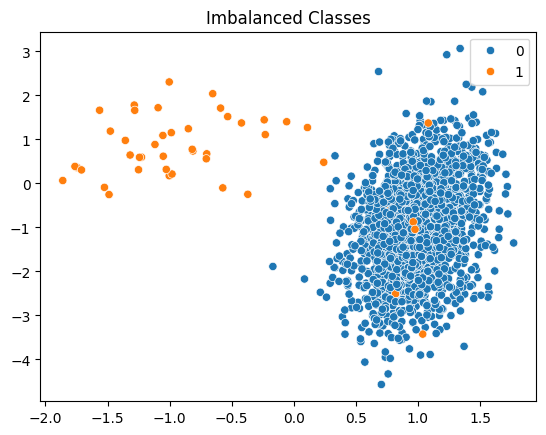

In [108]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
plt.title("Imbalanced Classes")
plt.show()

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

In [110]:
penalty = ['l1', 'l2', 'elasticnet', 'none']
C = [0.001, 0.01, 0.1, 1, 10, 100]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
log_model = LogisticRegression()
class_weights = [{0:w, 1:y} for w in [0.5, 1, 2, 5, 10, 50, 100] for y in [0.5, 1, 2, 5, 10, 50, 100]]
dict_params = dict(penalty=penalty, C=C, solver=solver, class_weight=class_weights)

In [111]:
class_weights

[{0: 0.5, 1: 0.5},
 {0: 0.5, 1: 1},
 {0: 0.5, 1: 2},
 {0: 0.5, 1: 5},
 {0: 0.5, 1: 10},
 {0: 0.5, 1: 50},
 {0: 0.5, 1: 100},
 {0: 1, 1: 0.5},
 {0: 1, 1: 1},
 {0: 1, 1: 2},
 {0: 1, 1: 5},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 2, 1: 0.5},
 {0: 2, 1: 1},
 {0: 2, 1: 2},
 {0: 2, 1: 5},
 {0: 2, 1: 10},
 {0: 2, 1: 50},
 {0: 2, 1: 100},
 {0: 5, 1: 0.5},
 {0: 5, 1: 1},
 {0: 5, 1: 2},
 {0: 5, 1: 5},
 {0: 5, 1: 10},
 {0: 5, 1: 50},
 {0: 5, 1: 100},
 {0: 10, 1: 0.5},
 {0: 10, 1: 1},
 {0: 10, 1: 2},
 {0: 10, 1: 5},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 0.5},
 {0: 50, 1: 1},
 {0: 50, 1: 2},
 {0: 50, 1: 5},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 0.5},
 {0: 100, 1: 1},
 {0: 100, 1: 2},
 {0: 100, 1: 5},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [112]:
cv = StratifiedKFold()
grid_imbal = GridSearchCV(estimator=log_model, param_grid=dict_params, scoring='accuracy', cv=cv)

In [113]:
grid_imbal.fit(X_train, y_train)

,estimator,LogisticRegression()
,param_grid,"{'C': [0.001, 0.01, ...], 'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.5, 1: 1}, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfgs', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [114]:
grid_imbal.best_params_

{'C': 0.001,
 'class_weight': {0: 2, 1: 0.5},
 'penalty': 'l1',
 'solver': 'liblinear'}

In [115]:
y_pred_im = grid_imbal.predict(X_test)

In [117]:
score_im = accuracy_score(y_test, y_pred_im)
print(f"Accuracy is {score_im}")
print("Classification Report for Multi Classification (OVR):")
print(classification_report(y_test, y_pred_im))
print("Confusion Matrix for Multi Classification (OVR):")
print(confusion_matrix(y_test, y_pred_im))

Accuracy is 0.988
Classification Report for Multi Classification (OVR):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       488
           1       1.00      0.50      0.67        12

    accuracy                           0.99       500
   macro avg       0.99      0.75      0.83       500
weighted avg       0.99      0.99      0.99       500

Confusion Matrix for Multi Classification (OVR):
[[488   0]
 [  6   6]]


In [118]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [119]:
X, y = make_classification(n_samples=10000, n_classes=2, random_state=30)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [121]:
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [122]:
log_model2 = LogisticRegression()
log_model2.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [123]:
model_prob = log_model2.predict_proba(X_test)

In [126]:
model_prob = model_prob[:,1]

In [127]:
dummy_model_auc = roc_auc_score(y_test, dummy_model_prob)
model_auc = roc_auc_score(y_test, model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9599012620466881


In [135]:
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

In [144]:
thresholds

array([           inf, 9.99993259e-01, 9.95270751e-01, 9.95183322e-01,
       9.94880173e-01, 9.94699675e-01, 9.89809223e-01, 9.89757812e-01,
       9.85519887e-01, 9.85488446e-01, 9.84797726e-01, 9.84774287e-01,
       9.81686804e-01, 9.81558149e-01, 9.81394109e-01, 9.81358089e-01,
       9.80434235e-01, 9.80378089e-01, 9.75543947e-01, 9.75319195e-01,
       9.71210118e-01, 9.71177290e-01, 9.70239325e-01, 9.69948647e-01,
       9.66464068e-01, 9.66461709e-01, 9.63899545e-01, 9.63875031e-01,
       9.60939817e-01, 9.60730820e-01, 9.60443146e-01, 9.60347131e-01,
       9.57789056e-01, 9.57576585e-01, 9.57208073e-01, 9.57079600e-01,
       9.55301702e-01, 9.55076092e-01, 9.50365808e-01, 9.50092794e-01,
       9.48733499e-01, 9.48681646e-01, 9.48299695e-01, 9.48160854e-01,
       9.47894220e-01, 9.47452020e-01, 9.40087589e-01, 9.39930351e-01,
       9.38790908e-01, 9.38499511e-01, 9.30044730e-01, 9.29729040e-01,
       9.28360832e-01, 9.28031948e-01, 9.26148167e-01, 9.25999825e-01,
      

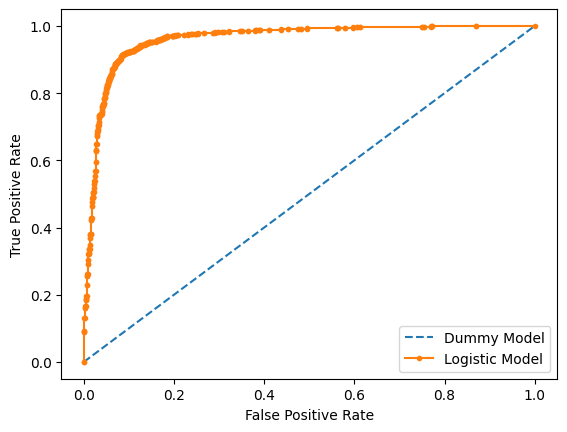

In [146]:
pyplot.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
pyplot.plot(model_fpr, model_tpr, marker='.', label='Logistic Model')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()
pyplot.show()

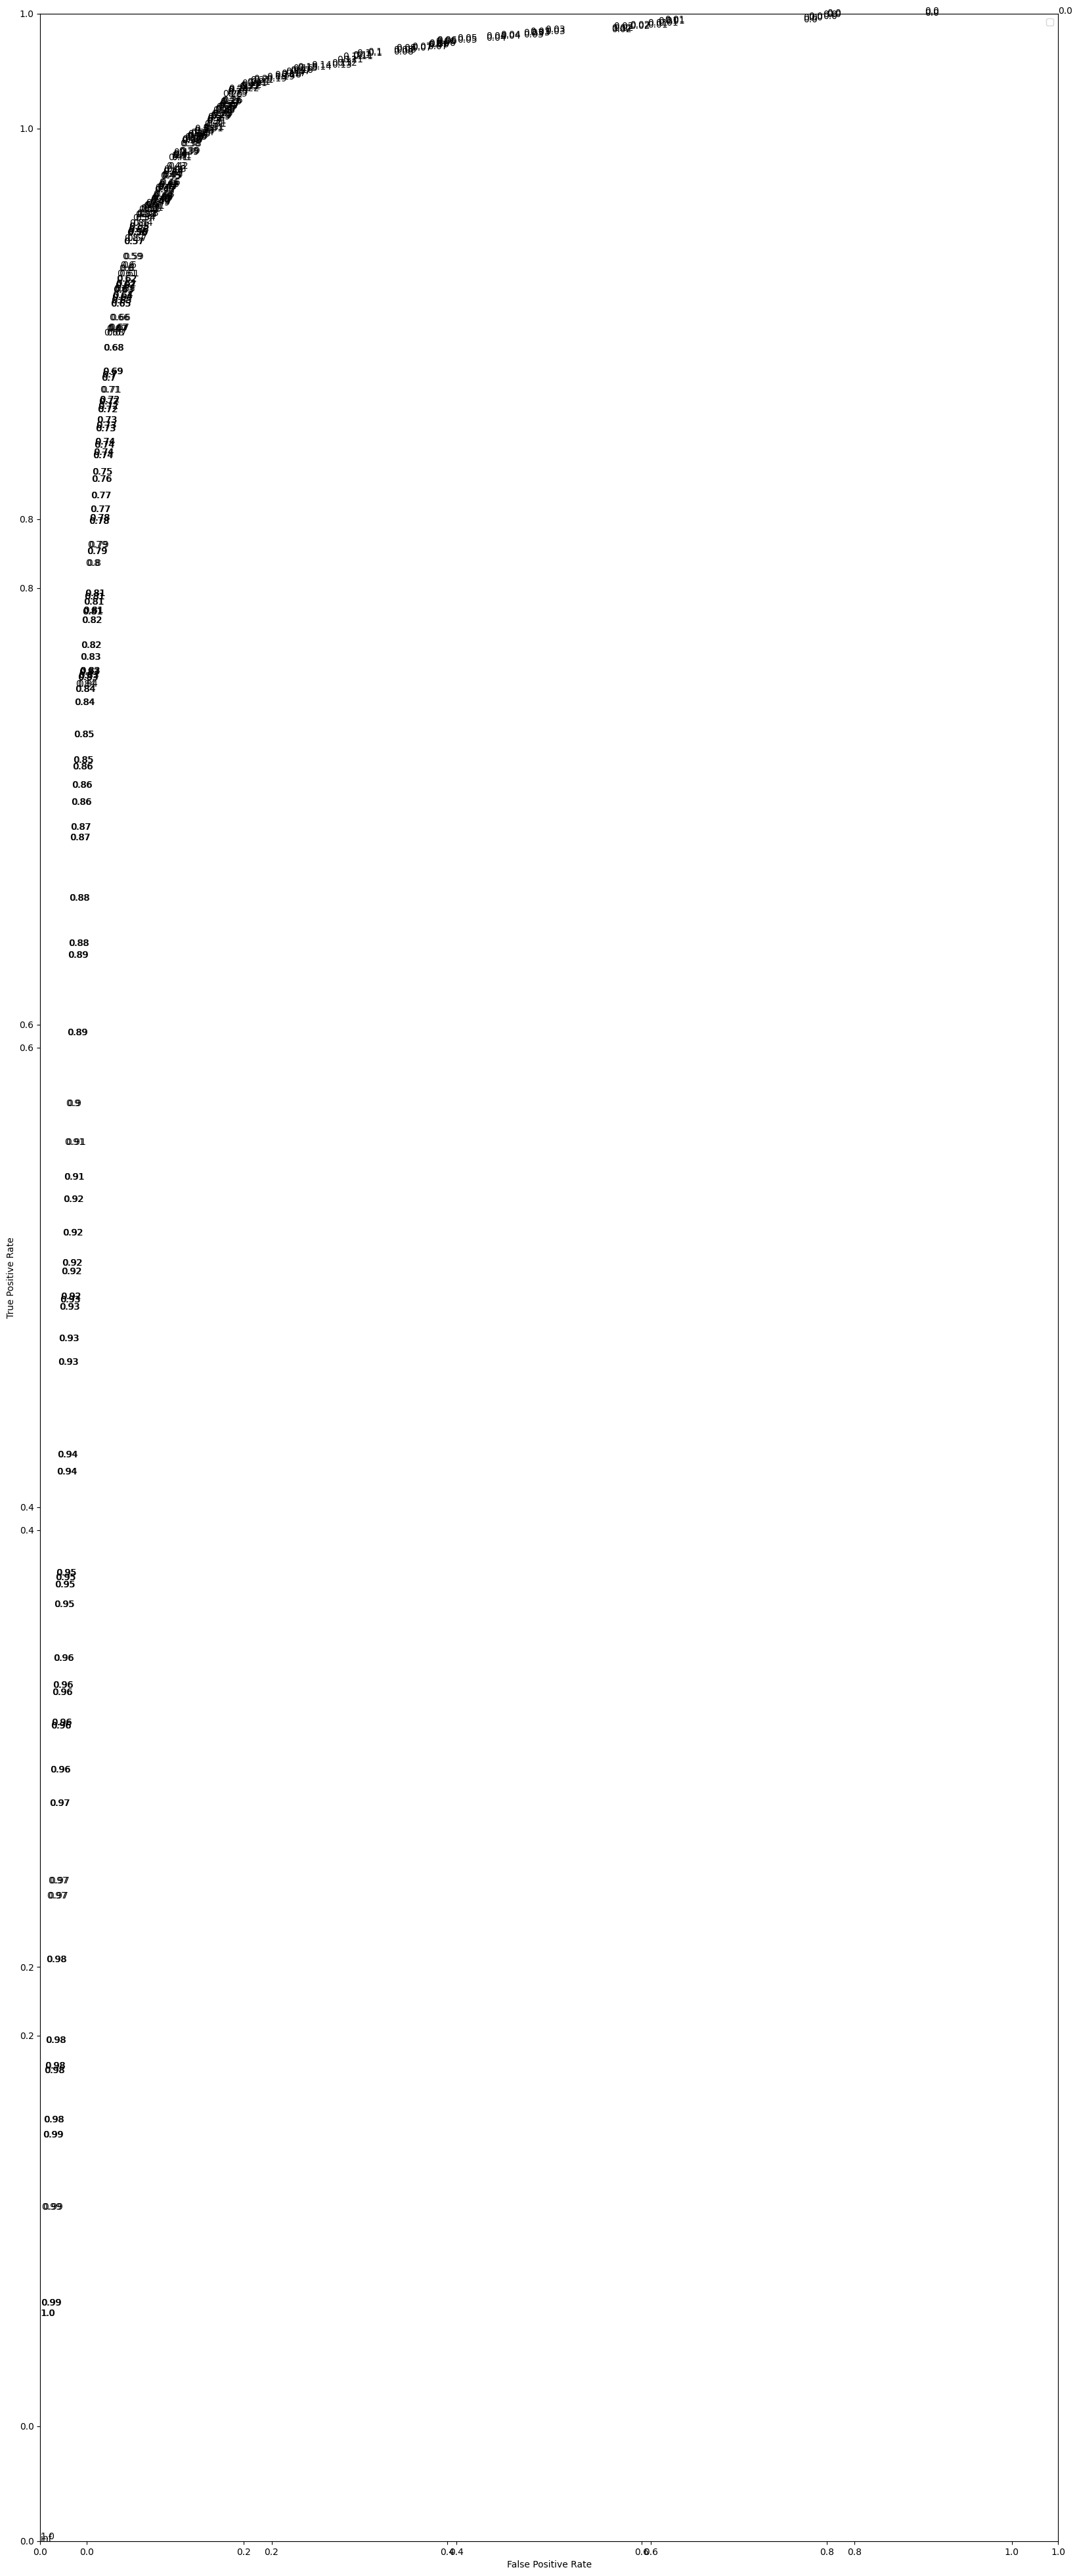

In [150]:
# plot the roc curve for the model
import numpy as np
fig = pyplot.figure(figsize=(20,50))
pyplot.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
pyplot.plot(model_fpr, model_tpr, marker='.', label='Logistic')
ax = fig.add_subplot(111)
for xyz in zip(model_fpr, model_tpr,thresholds):   
    ax.annotate('%s' % np.round(xyz[2],2), xy=(xyz[0],xyz[1]))
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()